# Modifying a Local Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
n = 73
t =  np.linspace(0, 10, n)
x = np.sin(t) + 0.05 * np.random.randn(n)
y = np.cos(t) + 0.05 * np.random.randn(n)
z = 0.4 * np.sqrt(t) * (np.sin(t) + np.cos(t)) + 0.05 * np.random.randn(n)
y0 = 0.4

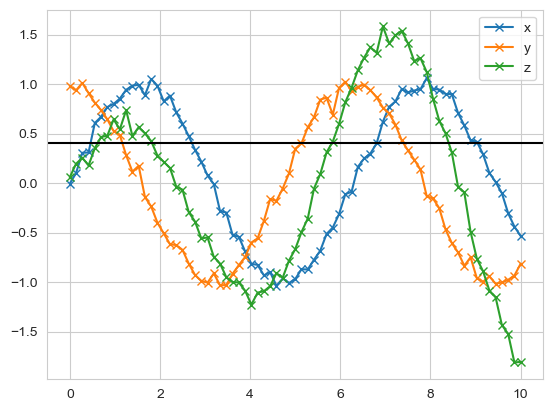

In [3]:
plt.figure()
plt.plot(t, np.concatenate([np.expand_dims(x, axis=1), np.expand_dims(y, axis=1), np.expand_dims(z, axis=1)], axis=1), marker="x")
plt.axhline(y0, color="black")
plt.legend(["x", "y", "z"])
plt.show()

The function findcrossing() takes two vectors (x and y) as input, representing data points from a function y(x). The output from findcrossing is a vector of estimated x values for which y(x) = 0.
Rather than find where y(x) = 0, we might want to find where y(x) crosses some other value. Note that y(x) = y0 is equivalent to y(x) - y0 = 0. This means we can use the same approach as before by simply changing the y values (by subtracting y0).

In [4]:
def findcrossing(x, y, z):
    y = y - z
    # Indices where current value and next value have opposite sign
    idx = np.where(y[:-1] * y[1:] <= 0)[0]
    # Linear interpolation between indices and next point
    xcross = (x[idx]*y[idx+1] - x[idx+1]*y[idx]) / (y[idx+1] - y[idx])

    return xcross

In [5]:
t_zerox = findcrossing(t, x, y0)
t_zerox

array([0.45916858, 2.71333578, 6.80337189, 9.04795851])

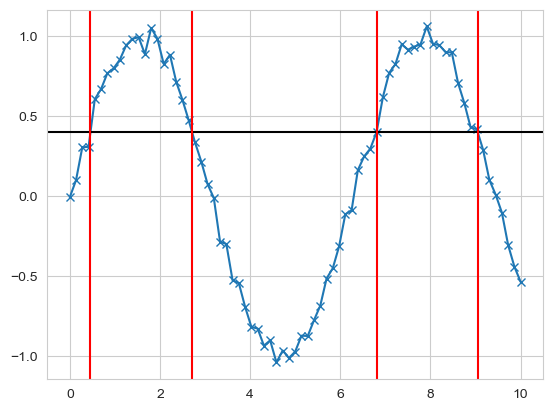

In [6]:
plt.figure()
plt.plot(t, x, marker="x")
plt.axhline(y0, color="black")
for i in t_zerox:
    plt.axvline(i, color='red')
plt.show()

In [7]:
t_zeroy = findcrossing(t, y, y0)
t_zeroy

array([1.1686698 , 5.13579328, 7.40458226])

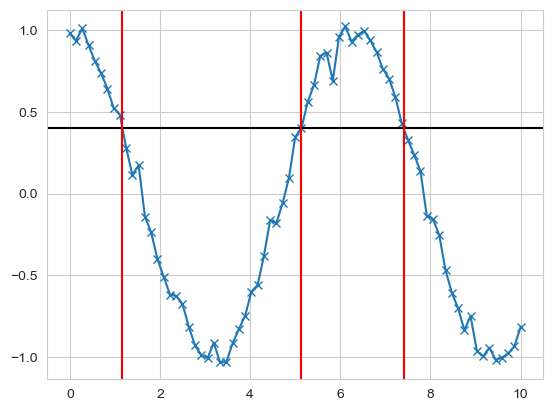

In [8]:
plt.figure()
plt.plot(t, y, marker="x")
plt.axhline(y0, color="black")
for i in t_zeroy:
    plt.axvline(i, color='red')
plt.show()

Although the new third input to findcrossing was assumed to be a scalar value, there is nothing to prevent it being another vector (the same size as y).
Passing a vector z will find the values of t such that y(t) - z(t) = 0 or y(t) = z(t). That is, we can call findcrossing with three vector inputs to find where two graphs intersect.

In [9]:
t_cross = findcrossing(t, x, y)
t_cross

array([0.74302711, 3.91743929, 7.03916942])

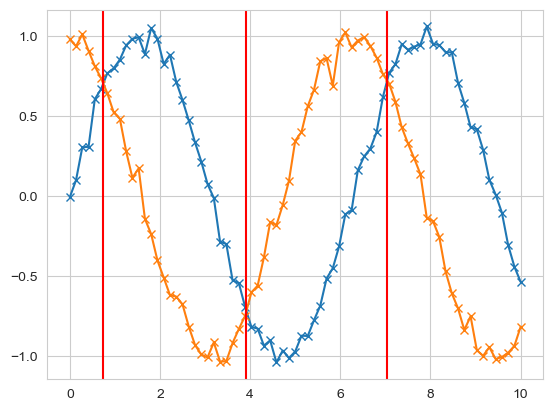

In [10]:
plt.figure()
plt.plot(t, np.concatenate([np.expand_dims(x, axis=1), np.expand_dims(y, axis=1)], axis=1), marker="x")
for i in t_cross:
    plt.axvline(i, color='red')
plt.show()